<b>Name : Dilshan J.V.A.P<br>
Index number : 190144D<br>
Assignment 2

Github: https://github.com/pramodj196/EN2550-Fundamentals-of-Image-Processing-and-Machine-Vision/tree/main/Assignment%202

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import linalg
import circle_fit as cf

# Q1)

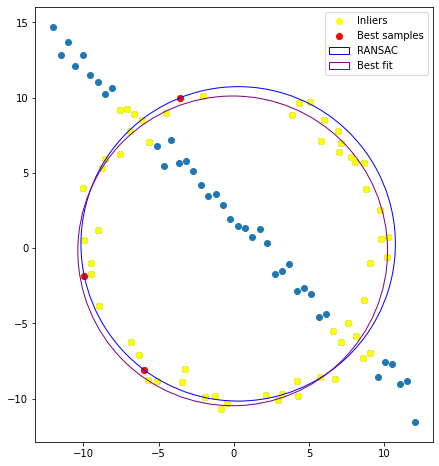

In [ ]:
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

def cir_plot(Data,Datalst,color):
    p1,p2,p3=Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]]
    cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
    c=plt.Circle((cirx,ciry),r,fill=False)
    c.set_color(color)
    return c

def RANSAC(Data,iter,thres,inliers_c):
    Max=0
    out=np.array([])
    for i in range(iter):
        randomP=np.random.choice(Data.size//2, size=3, replace=False)
        p1,p2,p3=Data[randomP[0]],Data[randomP[1]],Data[randomP[2]]
        cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
        T=np.array(abs(((Data[:,0]-cirx)**2+(Data[:,1]-ciry)**2)**0.5-r))
        if r>max(Data[:,1])*1.5:
            continue
        inliers=Data[T<thres]
        if len(inliers)>inliers_c:
            shrt_d=np.array(abs(((inliers[:,0]-cirx)**2+(inliers[:,1]-ciry)**2)**0.5-r))
            Mean = sum(shrt_d/shrt_d.size)
            if Max < len(inliers):
                out=randomP
                inli=inliers
                best=Mean
            elif Max == len(inliers) and best>Mean:
                out=randomP
                inli=inliers
                best=Mean
    return out,inli

Ran,best_inlier=RANSAC(X,35,1.96,50)         
c1=cir_plot(Ran,X, color = 'blue')
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c1 )
p1=ax.scatter(X[:,0],X[:,1])
inliers=ax.scatter(best_inlier[:,0],best_inlier[:,1], color='yellow' )
bestfit,inl=RANSAC(best_inlier,20,1.96,best_inlier.size//2.2)
c2=cir_plot(bestfit,best_inlier, color ='purple')
ax.add_artist( c2 )
Y=np.vstack((X[Ran[0]],X[Ran[1]],X[Ran[2]]))
best_samples=ax.scatter(Y[:,0],Y[:,1], c = 'r')
plt.legend(handles=[inliers,best_samples,c1,c2],labels=['Inliers','Best samples','RANSAC','Best fit'])
plt.show()

<b>Parameters of the RANSAC algorithm<br></b>
<ul>
<b><li> s = 3</li></b>
<ul>
The minimum number of points needed to estimate a circle is three. Hence, “S” is 
taken as 3.
</ul>

<b><li>inliers count = 50</li></b>
<ul>
The entire dataset consists of 100 points in which 50 are outliers and the remaining 
50 are inliers. Therefore, when an accurate circle estimation has been done, it should 
contain all the 50 inlier points. Therefore, the consensus set size has been set to 50.
</ul>

<b><li>threshold = 1.96</li></b>
<ul>
The set of points corresponding to a circle has been corrupted by mean-zero variance-one Gaussian noise. Therefore, a threshold of 1.96 gives a 0.95 probability of capturing all inliers.
</ul>

<b><li>N = 35</li></b>
<ul>
Since the initial number of points(s) is chosen as 3, by the Number of Samples vs. 
Outlier Ratio table, the number of samples(N) should be chosen as 35 to have a 
probability of 0.99 for selecting at least one outlier free random sample. 
</ul>
</ul>

# Q2)

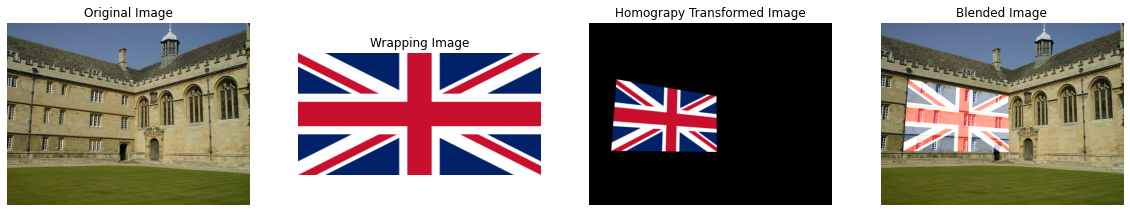

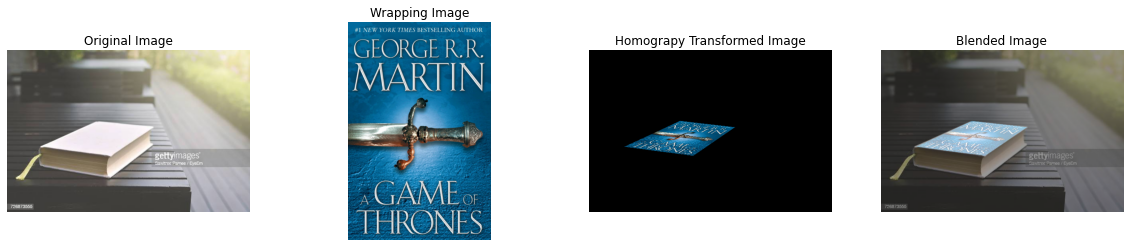

In [11]:
def MouseHandling(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

architecture_img = cv.imread(r'Images/002.jpg')
flag = cv.imread(r'Images/Flag_of_the_United_Kingdom.png')
height , width = architecture_img.shape[0] , architecture_img.shape[1]
f_width,f_height = flag.shape[1] , flag.shape[0]
pts_dst = np.array([[0,0] , [f_width-1,0] , [f_width-1,f_height-1] , [0,f_height-1] ])
cv.namedWindow("Image",1)
ppp = cv.cvtColor(architecture_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))
Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
transformed_flag = cv.warpPerspective(flag, np.linalg.inv(Homograpy_Matrix), (width, height))
blend_image = cv.addWeighted(architecture_img, 1, transformed_flag, 0.8, 0)

book_img = cv.imread(r'Images/book.jpg')
book_cover = cv.imread(r'Images/Game_of_thrones.webp')
height , width = book_img.shape[0] , book_img.shape[1]
b_width,b_height = book_cover.shape[1] , book_cover.shape[0]
pts_dst = np.array([[0,0] , [b_width-1,0] , [b_width-1,b_height-1] , [0,b_height-1] ])
cv.namedWindow("Image",1)
ppp = cv.cvtColor(book_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))
Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)
transformed = cv.warpPerspective(book_cover, np.linalg.inv(Homograpy_Matrix), (width, height))
blend_image = cv.addWeighted(book_img, 0.6, transformed, 0.5, 0)

<b>First, 4 point coordinates are taken which is given by user('mouseHandling()' function is related to this). These points denote destination points which are used to compute homography. <br>
Then the vertices of original image are taken and then calculate the homography using 'cv.findHomography()' inbuilt function.<br>
Finally "cv.addWeighted()" inbuilt fuction is used to blend the image and it makes necessary adjustments of the final stitched image.

# Q3) (a) SIFT feature mapping

(-0.5, 1599.5, 639.5, -0.5)

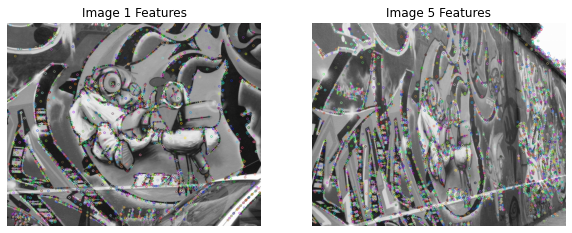

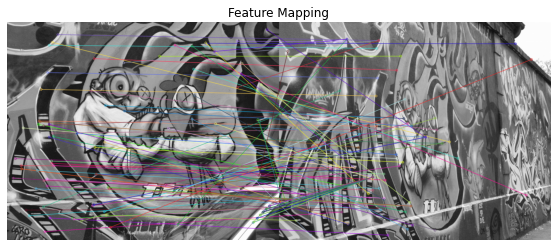

In [17]:
img1,img5 = cv.imread(r"graf/img1.ppm"),cv.imread(r"graf/img5.ppm")
img1_gray, img5_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = 0.09,edgeThreshold = 25,sigma =1)
keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray, None) 
keypoints_2, descriptors_2 = sift.detectAndCompute(img5_gray, None)  
keypoints_img_1 = np.zeros(img1_gray.shape)
keypoints_img_5 = np.zeros(img5_gray.shape)
keypoints_img_1 = cv.drawKeypoints(img1_gray, keypoints_1, keypoints_img_1)
keypoints_img_5 = cv.drawKeypoints(img5_gray, keypoints_2, keypoints_img_5)
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)
# Apply ratio test
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

matches_img = np.zeros(img1_gray.shape)
matches_img_fifty = np.zeros(img1_gray.shape)
matches_img = cv.drawMatchesKnn(img1_gray, keypoints_1, img5_gray, keypoints_2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
good_matches = np.squeeze(np.array(good_matches))
img1_gray = img1_gray.astype(np.float64) / 255
img5_gray = img5_gray.astype(np.float64) / 255

# (b) & (c)

[[ 6.48391779e-01  7.54188212e-02  2.19402971e+02]
 [ 2.40763020e-01  1.19155232e+00 -3.06316141e+01]
 [ 5.21770840e-04 -6.86124013e-06  1.00779145e+00]]


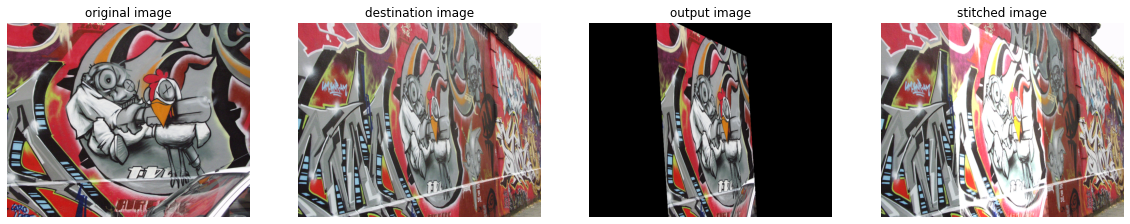

In [23]:
import random
def siftmatch(img1,img2):
    sift = cv.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)
    bf= cv.BFMatcher(cv.NORM_L1, crossCheck = True)
    matches = bf.match(descriptors_1, descriptors_2)
    sortmatches = sorted(matches, key = lambda x:x.distance)
    return matches,[keypoints_1,keypoints_2]
def SSD(corres, h):
    pts1 = np.transpose(np.matrix([corres[0].item(0), corres[0].item(1), 1]))
    estimatep1 = np.dot(h, pts1)
    estimatep2 = (1/estimatep1.item(2))*estimatep1
    pts2 = np.transpose(np.matrix([corres[0].item(2), corres[0].item(3), 1]))
    error = pts2 - estimatep2
    return np.linalg.norm(error)
def Homography(correspondences):
    Lst = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])
        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        Lst.append(a1)
        Lst.append(a2)
    matrixA = np.matrix(Lst)
    #svd composition
    u, s, v = np.linalg.svd(matrixA)
    h = np.reshape(v[8], (3, 3))
    h = (1/h.item(8)) * h
    return h
def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))
        #call the homography function on those points
        h = Homography(randomFour)
        inliers = []
        for i in range(len(corr)):
            d = SSD(corr[i], h)
            if d < 5:
                inliers.append(corr[i])
        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers
def corr_list(matches1,key):
    correspondenceList1 = []
    keypoints1 = [key[0],key[1]]
    for match in matches1:
        (x1, y1) = keypoints1[0][match.queryIdx].pt
        (x2, y2) = keypoints1[1][match.trainIdx].pt
        correspondenceList1.append([x1, y1, x2, y2])
    return correspondenceList1

img1,img2,img3,img4,img5 = cv.imread(r"graf/img1.ppm"), cv.imread(r"graf/img2.ppm") ,cv.imread(r"graf/img3.ppm"),cv.imread(r"graf/img4.ppm"), cv.imread(r"graf/img5.ppm")
img1,img2,img3,img4,img5 = cv.cvtColor(img1, cv.COLOR_BGR2RGB),cv.cvtColor(img2, cv.COLOR_BGR2RGB),cv.cvtColor(img3, cv.COLOR_BGR2RGB),cv.cvtColor(img4, cv.COLOR_BGR2RGB),cv.cvtColor(img5, cv.COLOR_BGR2RGB)

#calculate homographies
match1,ky1=siftmatch(img1,img2)
corrList1=corr_list(match1,ky1)
corrs1 = np.matrix(corrList1)
finalH1, inliers1 = ransac(corrs1, 0.6)
match2,ky2=siftmatch(img2,img3)
corrList2=corr_list(match2,ky2)
corrs2 = np.matrix(corrList2)
finalH2, inliers2 = ransac(corrs2, 0.6)
match3,ky3=siftmatch(img3,img4)
corrList3=corr_list(match3,ky3)
corrs3 = np.matrix(corrList3)
finalH3, inliers3 = ransac(corrs3, 0.6)
match4,ky4=siftmatch(img4,img5)
corrList4=corr_list(match4,ky4)
corrs4 = np.matrix(corrList4)
finalH4, inliers4 = ransac(corrs4, 0.6)
#Obtaining the homography matrix of 1 to 5
H = finalH4 @ finalH3 @ finalH2 @ finalH1
print(H)
dst1 = cv.warpPerspective(img1, H, ((img5.shape[1]), img5.shape[0]))

<b>Initially using separate homograpies of image 1 to 2 , 2 to 3, 3 to 4, 4 to 5, the homography of image 1 to 5 is calculated. Then I’ve obtained the 1 to 5 image homography by multiplying those homography matrices reversely. The homography of the two images is very high. Therefore it is very difficult to calculate the homography of image 1 to 5 directly. So according to the RANSAC algorithm, homography matrix can be calculated using Homography function.<br>
<br>
In the given problem, the geometric distance between the destination points and the resulting points is returned by 'SSD' function corresponds to homography matrix. Corresponding to given four random four points, the 'Homography' function returns the homography matrix. To genarate the most suitable homography matrix among all possible homography matrices, the 'ransac' function which consists with ransac algorithm is used.
So in here I’ve set the threshold value as '5' and got the most inliers according to that. After then the homograpies were calculated separately.
As we all know putting source and destination points according to a linear system is the mathematical procedure to get the homography matrix . Then we get the Transpose of the obtained matrix, multiply it with the previous version and take the eigen vector corresponding to the minimum eigen value. <br><br>
Finally to observe the accuracy of the above code, actual homography matrix and the calculated homography (which was calculated using above RANSAC algorithm) are compared. For that we get the sum of square difference between those two matrix. Hence we can get a reasonable value for it.

In [24]:
Original_Homography = [[6.2544644e-01,5.7759174e-02,2.2201217e+02],[2.2240536e-01,1.1652147e+00,-2.5605611e+01],[4.9212545e-04,-3.6542424e-05,1.0000000e+00]]
Calculated_Homography = [[ 6.48391779e-01,7.54188212e-02,2.19402971e+02],[2.40763020e-01,1.19155232e+00,-3.06316141e+01],[5.21770840e-04,-6.86124013e-06,1.00779145e+00]]
Original_Homography =np.array(Original_Homography)
Calculated_Homography = np.array(Calculated_Homography)
SSD_Calc= np.sum(np.sum((Original_Homography-Calculated_Homography)*(Original_Homography-Calculated_Homography)))
print("SSD Value =",SSD_Calc)

SSD Value = 32.070556316892485
